In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import get_data

ModuleNotFoundError: No module named 'psycopg2'

In [2]:
engine = get_data.engine

In [6]:
df = pd.read_sql_query('SELECT datadate,gvkey,cusip,revty,xoprq FROM quarterly',engine)
df.head()
df.tail()
# REVTY = Revenue - Total3
# XOPRQ = Operating Expense- Total

,datadate,gvkey,cusip,revty,xoprq
194942,2001-09-30,063417,89854H102,685.909,191.142
194943,2001-12-31,063417,89854H102,916.144,197.493
194944,2002-03-31,063417,89854H102,254.031,223.792
194945,2002-06-30,063417,89854H102,507.716,227.143
194946,2002-09-30,063417,89854H102,759.605,226.610


,datadate,gvkey,cusip,revty,xoprq
2458,2015-09-30,121440,91307C102,1060.886,-9.106
2460,2016-03-31,121440,91307C102,369.000,-2.400
4479,2008-09-30,157373,92840M102,7809.000,-3765.000
4480,2008-12-31,157373,92840M102,9787.000,-1084.000
9507,2008-12-31,001257,014752109,211.097,-15.762
...,...,...,...,...,...
192370,2020-06-30,033110,85914M107,-61.413,-16.726
192375,2022-06-30,033110,85914M107,-77.218,-83.886
192376,2022-09-30,033110,85914M107,-235.713,-121.319
192377,2022-12-31,033110,85914M107,-239.948,-16.136


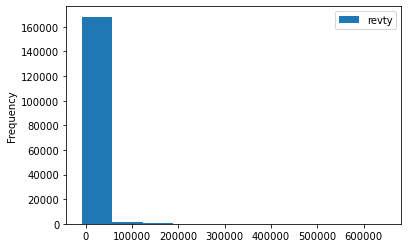

In [11]:
df.plot('xoprq',kind='hist')
df.query('xoprq < 0')

In [12]:
df.query('revty < 0')

,datadate,gvkey,cusip,revty,xoprq
7536,2020-03-31,183780,90187B804,-1281.170,49.533
7537,2020-06-30,183780,90187B804,-1246.185,49.214
7538,2020-09-30,183780,90187B804,-1179.141,50.932
7539,2020-12-31,183780,90187B804,-965.733,42.674
8229,2022-09-30,187368,92840H400,-0.583,16.563
...,...,...,...,...,...
192375,2022-06-30,033110,85914M107,-77.218,-83.886
192376,2022-09-30,033110,85914M107,-235.713,-121.319
192377,2022-12-31,033110,85914M107,-239.948,-16.136
192378,2023-03-31,033110,85914M107,-67.574,88.003


In [23]:
# Filter rows where 'xoprq' column is greater than 0 and 'revty' column is greater than 0
df_clean = df[(df['xoprq'] > 0) & (df['revty'] > 0)]



In [24]:
df_clean["ebit_margin"] = (df_clean["revty"] - df_clean["xoprq"])/ df_clean["revty"]

df_clean["revenue_expense_ratio"] = df_clean["revty"] / df_clean["xoprq"]

df_clean.sort_values(by='ebit_margin',ascending=False).head()

#things to consider (new companies might be underestimating their expenses or overestimating)

<ipython-input-24-2cc549b5e817>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["ebit_margin"] = (df_clean["revty"] - df_clean["xoprq"])/ df_clean["revty"]
<ipython-input-24-2cc549b5e817>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["revenue_expense_ratio"] = df_clean["revty"] / df_clean["xoprq"]


,datadate,gvkey,cusip,revty,xoprq,ebit_margin,revenue_expense_ratio
120936,2000-12-31,064355,G39637205,76.336,0.200,0.997380,381.680000
77854,2000-12-31,064355,G39637205,76.336,0.200,0.997380,381.680000
77866,2003-12-31,064355,G39637205,75.246,0.218,0.997103,345.165138
120948,2003-12-31,064355,G39637205,75.246,0.218,0.997103,345.165138
77858,2001-12-31,064355,G39637205,61.534,0.200,0.996750,307.670000
